#Importing Libraries

In [ ]:
import os;
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Creating Custom file reader

In [ ]:
missing_values=["N/a","na",np.nan]
csv_reader= lambda path: pd.read_csv(path, na_values=missing_values)

#Reading the Required Files

In [ ]:
milk = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/milk_production.csv")
cotton = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/cotton_production.csv")
egg = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/egg_production.csv")
horse = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/horses_population.csv")
meat = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/meat_production.csv")
rabbit = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/rabbit_population.csv")
wool = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/wool_production.csv")
yak = csv_reader("/content/drive/MyDrive/Colab Notebooks/dataset/yak_population.csv")

#Display the read dataset before merge

In [ ]:
print("Milk Production By District: ")
display(milk.head(5))
print("Cotton Production By District: ")
display(cotton.head(5))
print("Egg Production By District: ")
display(egg.head(5))
print("Horse Populatoin By District: ")
display(horse.head(5))
print("Meat Production By District: ")
display(meat.head(5))
print("Rabbit Population By District: ")
display(rabbit.head(5))
print("Wool Production By District: ")
display(wool.head(5))
print("Yak Population By District: ")
display(yak.head(5))

Milk Production By District: 


,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,7819,13501,2948,5493,8441.0
3,E.MOUNTAIN,31284,31855,15324,20339,35663.0
4,PANCHTHAR,14854,11331,8511,9835,18346.0


Cotton Production By District: 


,DISTRICT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,Dang,106,74,700
1,Banke,27,41,1519
2,Bardiya,10,12,1200
3,NEPAL,143,127,890


Egg Production By District: 


,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,77512.0,465,5506,34,5540
2,SOLUKHUMBU,42671.0,374,2345,28,2373
3,E.MOUNTAIN,135548.0,1180,10271,87,10358
4,PANCHTHAR,63779.0,261,5581,19,5600


Horse Populatoin By District: 


,DISTRICT,Horses/Asses
0,TAPLEJUNG,543
1,SANKHUWASHAVA,358
2,SOLUKHUMBU,1775
3,PANCHTHAR,15
4,ILLAM,2815


Meat Production By District: 


,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,607,31,491,443,172,0,1744
1,SANKHUWASABHA,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,1123,28,416,428,166,0,2161
3,E.MOUNTAIN,3376,100,1865,1380,640,1,7362
4,PANCHTHAR,1496,4,940,730,248,1,3419


Rabbit Population By District: 


,DISTRICT,Rabbit
0,TAPLEJUNG,506
1,SANKHUWASHAVA,313
2,SOLUKHUMBU,105
3,PANCHTHAR,29
4,ILLAM,240


Wool Production By District: 


,DISTRICT,SHEEPS NO.,SHEEP WOOL PRODUCED
0,TAPLEJUNG,5777,3519
1,SANKHUWASHAVA,12181,9050
2,SOLUKHUMBU,8461,6286
3,E.MOUNTAIN,26419,18855
4,PANCHTHAR,1338,994


Yak Population By District: 


,DISTRICT,YAK/NAK/CHAURI
0,TAPLEJUNG,3465
1,SANKHUWASHAVA,3945
2,SOLUKHUMBU,12235
3,PANCHTHAR,1075
4,ILLAM,165


#Merge the dataset

In [ ]:
dfs = [milk, cotton, egg, horse, meat, rabbit, wool, yak]
# Merge dataframes using outer join
df = pd.merge(dfs[0], dfs[1], on='DISTRICT', how='outer')
for d in dfs[2:]:
    df = pd.merge(df, d, on='DISTRICT', how='outer')

In [ ]:
df.head()

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,...,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,TAPLEJUNG,8123.0,4987.0,5389.0,4257.0,9645.0,NaN,NaN,NaN,15366.0,...,31.0,491.0,443.0,172.0,0.0,1744.0,506.0,5777.0,3519.0,3465.0
1,SANKHUWASHAVA,15342.0,13367.0,6988.0,10589.0,17577.0,NaN,NaN,NaN,77512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,313.0,12181.0,9050.0,3945.0
2,SOLUKHUMBU,7819.0,13501.0,2948.0,5493.0,8441.0,NaN,NaN,NaN,42671.0,...,28.0,416.0,428.0,166.0,0.0,2161.0,105.0,8461.0,6286.0,12235.0
3,E.MOUNTAIN,31284.0,31855.0,15324.0,20339.0,35663.0,NaN,NaN,NaN,135548.0,...,100.0,1865.0,1380.0,640.0,1.0,7362.0,NaN,26419.0,18855.0,NaN
4,PANCHTHAR,14854.0,11331.0,8511.0,9835.0,18346.0,NaN,NaN,NaN,63779.0,...,4.0,940.0,730.0,248.0,1.0,3419.0,29.0,1338.0,994.0,1075.0


#Dataset Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                108 non-null    object 
 1   MILKING  COWS NO.       96 non-null     float64
 2   MILKING  BUFFALOES NO.  96 non-null     float64
 3   COW MILK                96 non-null     float64
 4   BUFF MILK               96 non-null     float64
 5   TOTAL MILK PRODUCED     95 non-null     float64
 6   AREA (Ha.)              4 non-null      float64
 7   PROD. (Mt.)             4 non-null      float64
 8   YIELD Kg/Ha             4 non-null      float64
 9   LAYING HEN              96 non-null     float64
 10  LAYING DUCK             96 non-null     float64
 11  HEN EGG                 96 non-null     float64
 12  DUCK EGG                96 non-null     float64
 13  TOTAL EGG               96 non-null     float64
 14  Horses/Asses            60 non-null     fl

In [ ]:
df.isna().sum()

DISTRICT                    0
MILKING  COWS NO.          12
MILKING  BUFFALOES NO.     12
COW MILK                   12
BUFF MILK                  12
TOTAL MILK PRODUCED        13
AREA (Ha.)                104
PROD. (Mt.)               104
YIELD Kg/Ha               104
LAYING HEN                 12
LAYING DUCK                12
HEN EGG                    12
DUCK EGG                   12
TOTAL EGG                  12
Horses/Asses               48
BUFF                       12
MUTTON                     12
CHEVON                     12
PORK                       12
CHICKEN                    12
DUCK MEAT                  12
TOTAL MEAT                 12
Rabbit                     53
SHEEPS NO.                 12
SHEEP WOOL PRODUCED        12
YAK/NAK/CHAURI             73
dtype: int64

In [ ]:
df[df.duplicated()]

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,...,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI


#Data Visualtion before cleaning

<Axes: >

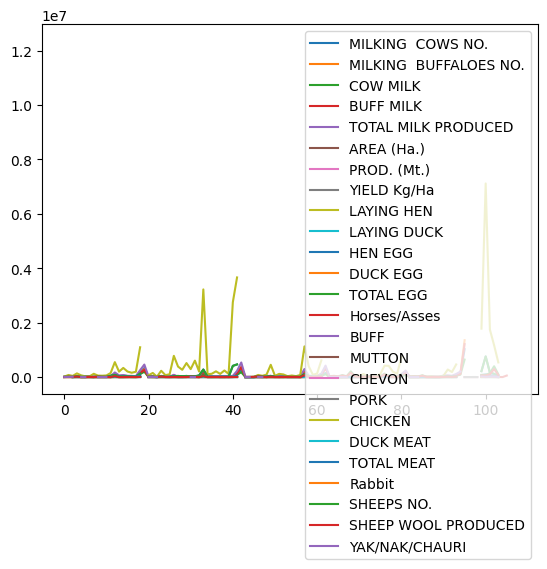

In [ ]:
df.plot(kind = "line")

<Axes: >

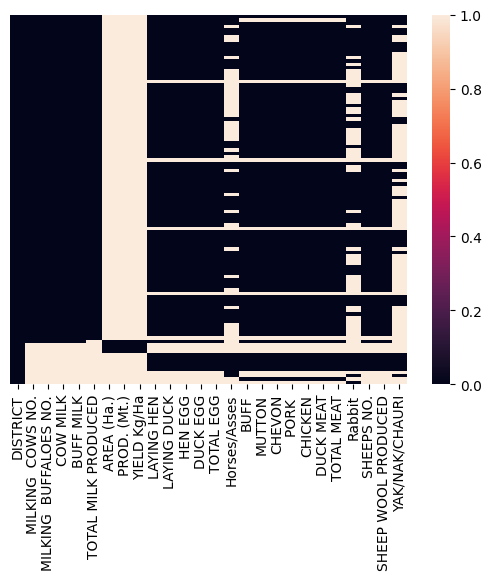

In [ ]:
sns.heatmap(df.isna(), yticklabels = False)

#Data Cleaning & Preprocessing

In [ ]:
cleaned_df =  df

In [ ]:
# Replace spaces with underscores and convert column names to lowercase
cleaned_df.columns = cleaned_df.columns.str.lower().str.replace(' ', '_')

# Remove double underscores
cleaned_df.columns = cleaned_df.columns.str.replace('__', '_')

# Remove periods
cleaned_df.columns = cleaned_df.columns.str.replace('.', '')

# Convert all data in the 'district' column to uppercase
cleaned_df['district'] = cleaned_df['district'].str.upper()

cleaned_df.sum()

<ipython-input-75-1d1f7b3e92f6>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cleaned_df.columns = cleaned_df.columns.str.replace('.', '')


district                TAPLEJUNGSANKHUWASHAVASOLUKHUMBUE.MOUNTAINPANC...
milking_cows_no                                                 4104540.0
milking_buffaloes_no                                            5421536.0
cow_milk                                                        2575225.0
buff_milk                                                       4841765.0
total_milk_produced                                             5562743.0
area_(ha)                                                           286.0
prod_(mt)                                                           254.0
yield_kg/ha                                                        4309.0
laying_hen                                                     49414062.9
laying_duck                                                      723708.0
hen_egg                                                         5176664.0
duck_egg                                                          55624.0
total_egg                             

#Filter the Dataframe District column

In [ ]:
province_1 = ['BHOJPUR', 'DHANKUTA', 'ILAM', 'JHAPA', 'KHOTANG', 'MORANG', 'OKHALDHUNGA', 'PANCHTHAR', 'SANKHUWASABHA', 'SOLUKHUMBU', 'SUNSARI', 'TAPLEJUNG', 'TERHATHUM', 'UDAYAPUR']

province_2 = ['BARA', 'DHANUSA', 'MAHOTTARI', 'PARSA', 'RAUTAHAT', 'SAPTARI', 'SARLAHI', 'SIRAHA']

province_3 = ['BHAKTAPUR', 'CHITWAN', 'DHADING', 'DOLAKHA', 'KATHMANDU', 'KAVREPALANCHOK', 'LALITPUR', 'MAKWANPUR', 'NUWAKOT', 'RAMECHHAP', 'RASUWA', 'SINDHULI', 'SINDHUPALCHOK']

province_4 = ['BAGLUNG', 'GORKHA', 'KASKI', 'LAMJUNG', 'MANANG', 'MUSTANG', 'MYAGDI', 'NAWALPUR', 'PARBAT', 'SYANGJA', 'TANAHUN']

province_5 = ['ARGHAKHANCHI', 'BANKE', 'BARDIYA', 'DANG' , 'GULMI', 'KAPILVASTU', 'PALPA', 'NAWALPARASI', 'PYUTHAN', 'ROLPA', 'RUPANDEHI']

province_6 = ['DAILEKH', 'DOLPA', 'HUMLA', 'JAJARKOT', 'JUMLA', 'KALIKOT', 'MUGU', 'SALYAN', 'SURKHET', 'RUKUM']

province_7 = ['ACHHAM', 'BAITADI', 'BAJHANG', 'BAJURA', 'DADELDHURA', 'DARCHULA', 'DOTI', 'KAILALI', 'KANCHANPUR']

districts_of_nepal = province_1 + province_2 + province_3 + province_4 + province_5 + province_6 + province_7

# districts_of_nepal

In [ ]:
# Filter rows based on districts_of_nepal
cleaned_df = cleaned_df[cleaned_df['district'].isin(districts_of_nepal)]

# Reset index after dropping rows
cleaned_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
cleaned_df.sum()

district                TAPLEJUNGSOLUKHUMBUPANCHTHARTERHATHUMDHANKUTAB...
milking_cows_no                                                  901719.0
milking_buffaloes_no                                            1186137.0
cow_milk                                                         561873.0
buff_milk                                                       1025748.0
total_milk_produced                                             1587620.0
area_(ha)                                                           143.0
prod_(mt)                                                           127.0
yield_kg/ha                                                        3419.0
laying_hen                                                     11070882.3
laying_duck                                                      163989.0
hen_egg                                                         1211706.0
duck_egg                                                          12608.0
total_egg                             

#Remove Outliers

In [ ]:
# Function to remove outliers
def remove_outliers(df, threshold=3):
    # Initialize a boolean mask to mark outliers
    outlier_mask = np.full(df.shape[0], False, dtype=bool)

    # Iterate over columns
    for column in df.columns:
        if df[column].dtype != 'object':  # Exclude non-numeric columns
            # Calculate the mean and standard deviation of the column
            mean = df[column].mean()
            std = df[column].std()

            # Mark outliers based on the threshold
            outlier_mask |= (df[column] < mean - threshold * std) | (df[column] > mean + threshold * std)

    # Return DataFrame without outliers
    return df[~outlier_mask]

In [ ]:
# Remove outliers
cleaned_df = remove_outliers(cleaned_df)

# Reset index after removing outliers
cleaned_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
cleaned_df.head()

,district,milking_cows_no,milking_buffaloes_no,cow_milk,buff_milk,total_milk_produced,area_(ha),prod_(mt),yield_kg/ha,laying_hen,...,mutton,chevon,pork_,chicken,duck_meat,total_meat,rabbit,sheeps_no,sheep_wool_produced,yak/nak/chauri
0,TAPLEJUNG,8123.0,4987.0,5389.0,4257.0,9645.0,NaN,NaN,NaN,15366.0,...,31.0,491.0,443.0,172.0,0.0,1744.0,506.0,5777.0,3519.0,3465.0
1,PANCHTHAR,14854.0,11331.0,8511.0,9835.0,18346.0,NaN,NaN,NaN,63779.0,...,4.0,940.0,730.0,248.0,1.0,3419.0,29.0,1338.0,994.0,1075.0
2,TERHATHUM,18880.0,13276.0,10089.0,11500.0,21589.0,NaN,NaN,NaN,26030.0,...,24.0,399.0,486.0,116.0,1.0,3384.0,206.0,7083.0,5262.0,NaN
3,DHANKUTA,12523.0,5391.0,8176.0,4579.0,12755.0,NaN,NaN,NaN,120878.0,...,2.0,405.0,462.0,471.0,2.0,2863.0,213.0,577.0,324.0,NaN
4,BHOJPUR,14103.0,16342.0,7324.0,14184.0,21508.0,NaN,NaN,NaN,53957.0,...,51.0,313.0,919.0,251.0,2.0,2787.0,42.0,18210.0,13530.0,887.0


In [ ]:
cleaned_df.head()

,district,milking_cows_no,milking_buffaloes_no,cow_milk,buff_milk,total_milk_produced,area_(ha),prod_(mt),yield_kg/ha,laying_hen,...,mutton,chevon,pork_,chicken,duck_meat,total_meat,rabbit,sheeps_no,sheep_wool_produced,yak/nak/chauri
0,TAPLEJUNG,8123.0,4987.0,5389.0,4257.0,9645.0,NaN,NaN,NaN,15366.0,...,31.0,491.0,443.0,172.0,0.0,1744.0,506.0,5777.0,3519.0,3465.0
1,PANCHTHAR,14854.0,11331.0,8511.0,9835.0,18346.0,NaN,NaN,NaN,63779.0,...,4.0,940.0,730.0,248.0,1.0,3419.0,29.0,1338.0,994.0,1075.0
2,TERHATHUM,18880.0,13276.0,10089.0,11500.0,21589.0,NaN,NaN,NaN,26030.0,...,24.0,399.0,486.0,116.0,1.0,3384.0,206.0,7083.0,5262.0,NaN
3,DHANKUTA,12523.0,5391.0,8176.0,4579.0,12755.0,NaN,NaN,NaN,120878.0,...,2.0,405.0,462.0,471.0,2.0,2863.0,213.0,577.0,324.0,NaN
4,BHOJPUR,14103.0,16342.0,7324.0,14184.0,21508.0,NaN,NaN,NaN,53957.0,...,51.0,313.0,919.0,251.0,2.0,2787.0,42.0,18210.0,13530.0,887.0


#Handle Missing Values

In [ ]:
# Replace NaN with 0
cleaned_df = cleaned_df.fillna(0)

# Check for NaN values
print(cleaned_df.isna().sum())

district                0
milking_cows_no         0
milking_buffaloes_no    0
cow_milk                0
buff_milk               0
total_milk_produced     0
area_(ha)               0
prod_(mt)               0
yield_kg/ha             0
laying_hen              0
laying_duck             0
hen_egg                 0
duck_egg                0
total_egg               0
horses/asses            0
buff                    0
mutton                  0
chevon                  0
pork_                   0
chicken                 0
duck_meat               0
total_meat              0
rabbit                  0
sheeps_no               0
sheep_wool_produced     0
yak/nak/chauri          0
dtype: int64


#Data Visualization after Cleaning

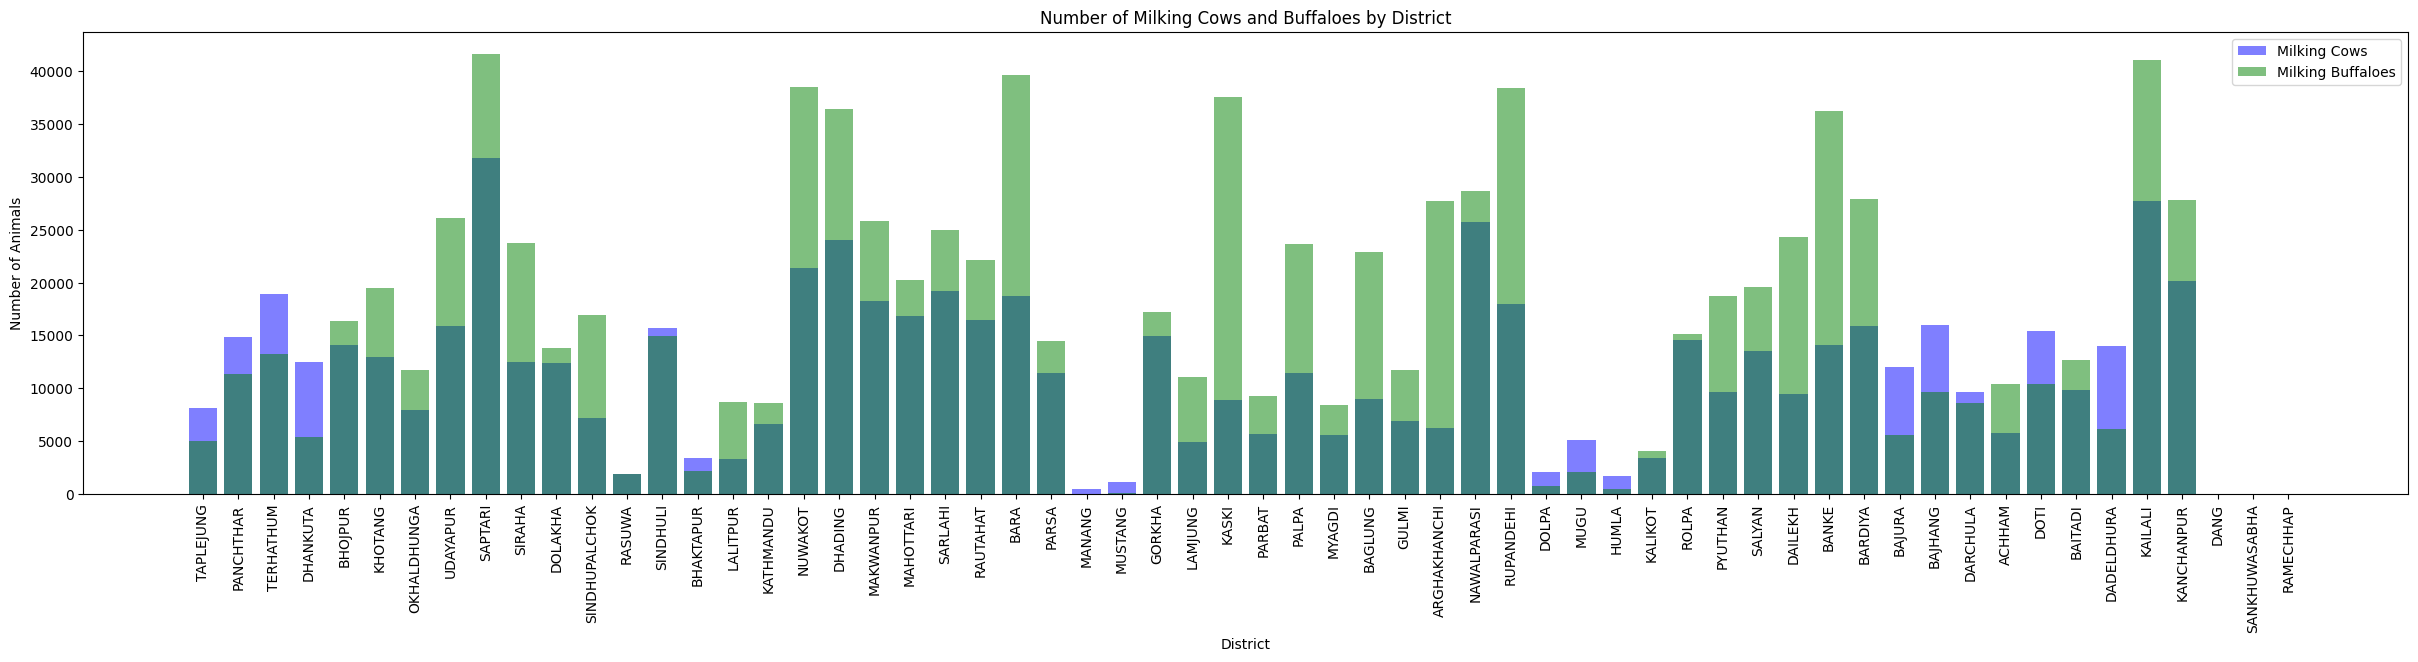

In [ ]:
# Bar Chart
plt.figure(figsize=(30, 6))
plt.bar(cleaned_df['district'], cleaned_df['milking_cows_no'], color='blue', alpha=0.5, label='Milking Cows')
plt.bar(cleaned_df['district'], cleaned_df['milking_buffaloes_no'], color='green', alpha=0.5, label='Milking Buffaloes')
plt.xlabel('District')
plt.ylabel('Number of Animals')
plt.title('Number of Milking Cows and Buffaloes by District')
plt.xticks(rotation=90)
plt.legend()
plt.show()

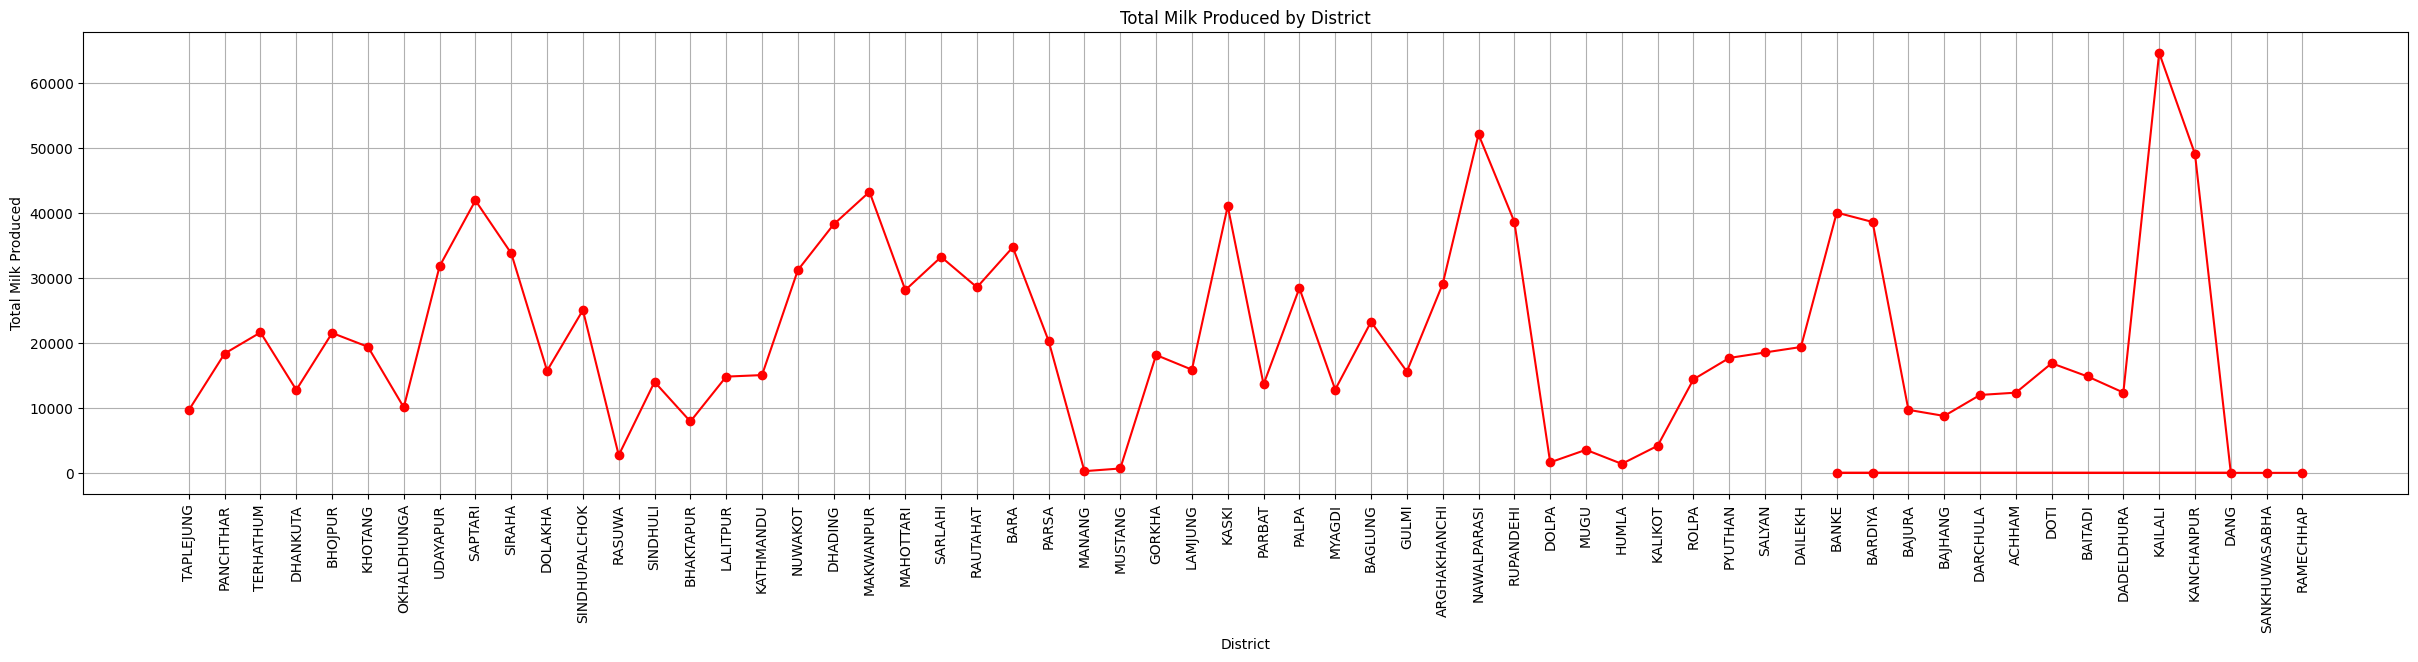

In [ ]:
# Line Plot
plt.figure(figsize=(30, 6))
plt.plot(cleaned_df['district'], cleaned_df['total_milk_produced'], marker='o', color='red')
plt.xlabel('District')
plt.ylabel('Total Milk Produced')
plt.title('Total Milk Produced by District')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

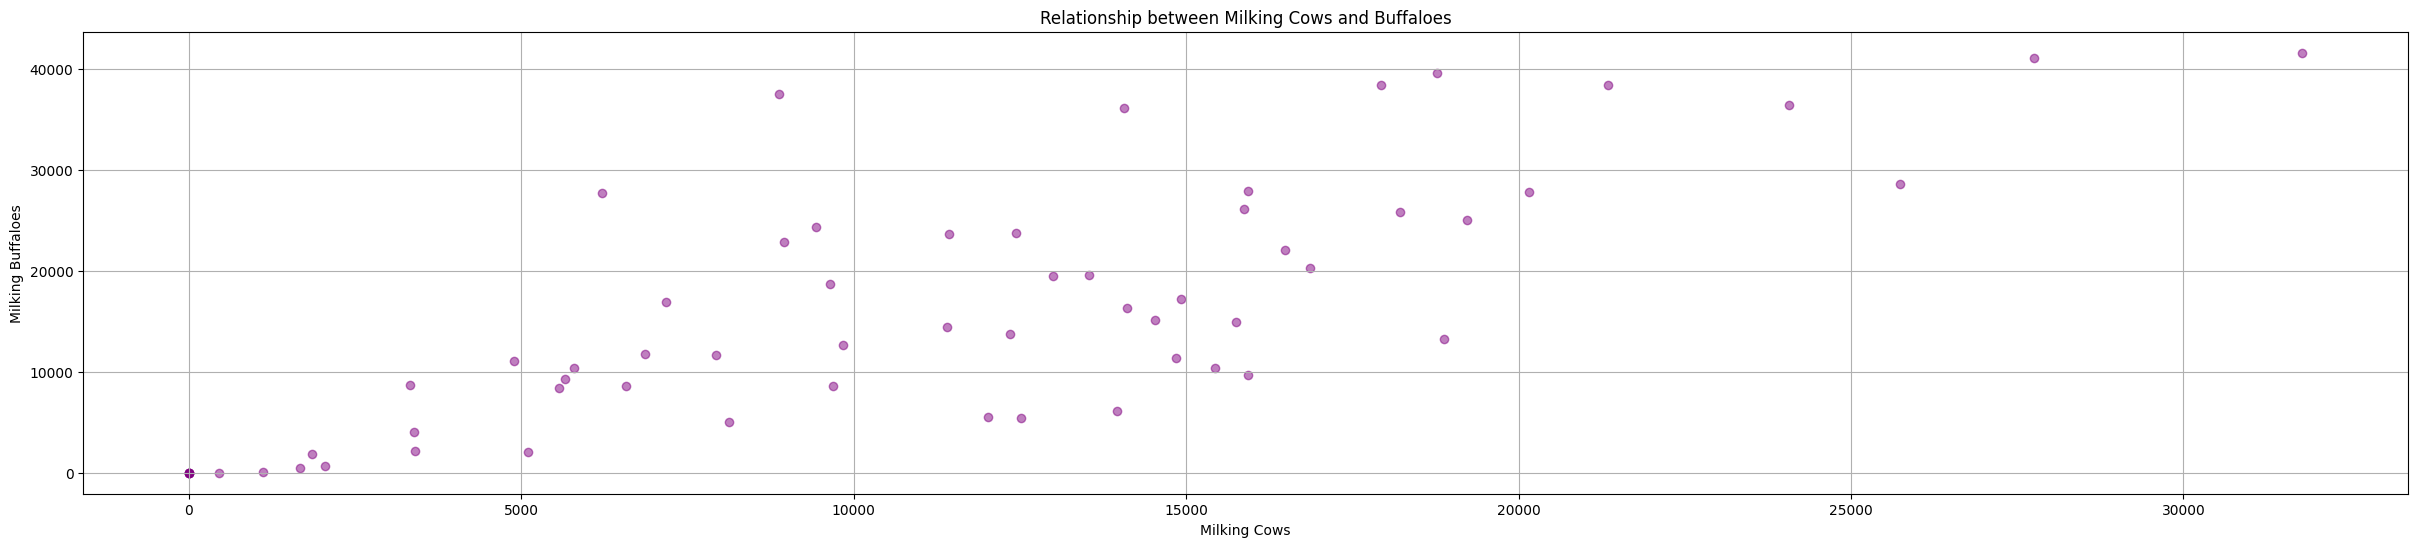

In [ ]:
# Scatter Plot
plt.figure(figsize=(30, 6))
plt.scatter(cleaned_df['milking_cows_no'], cleaned_df['milking_buffaloes_no'], color='purple', alpha=0.5)
plt.xlabel('Milking Cows')
plt.ylabel('Milking Buffaloes')
plt.title('Relationship between Milking Cows and Buffaloes')
plt.grid(True)
plt.show()

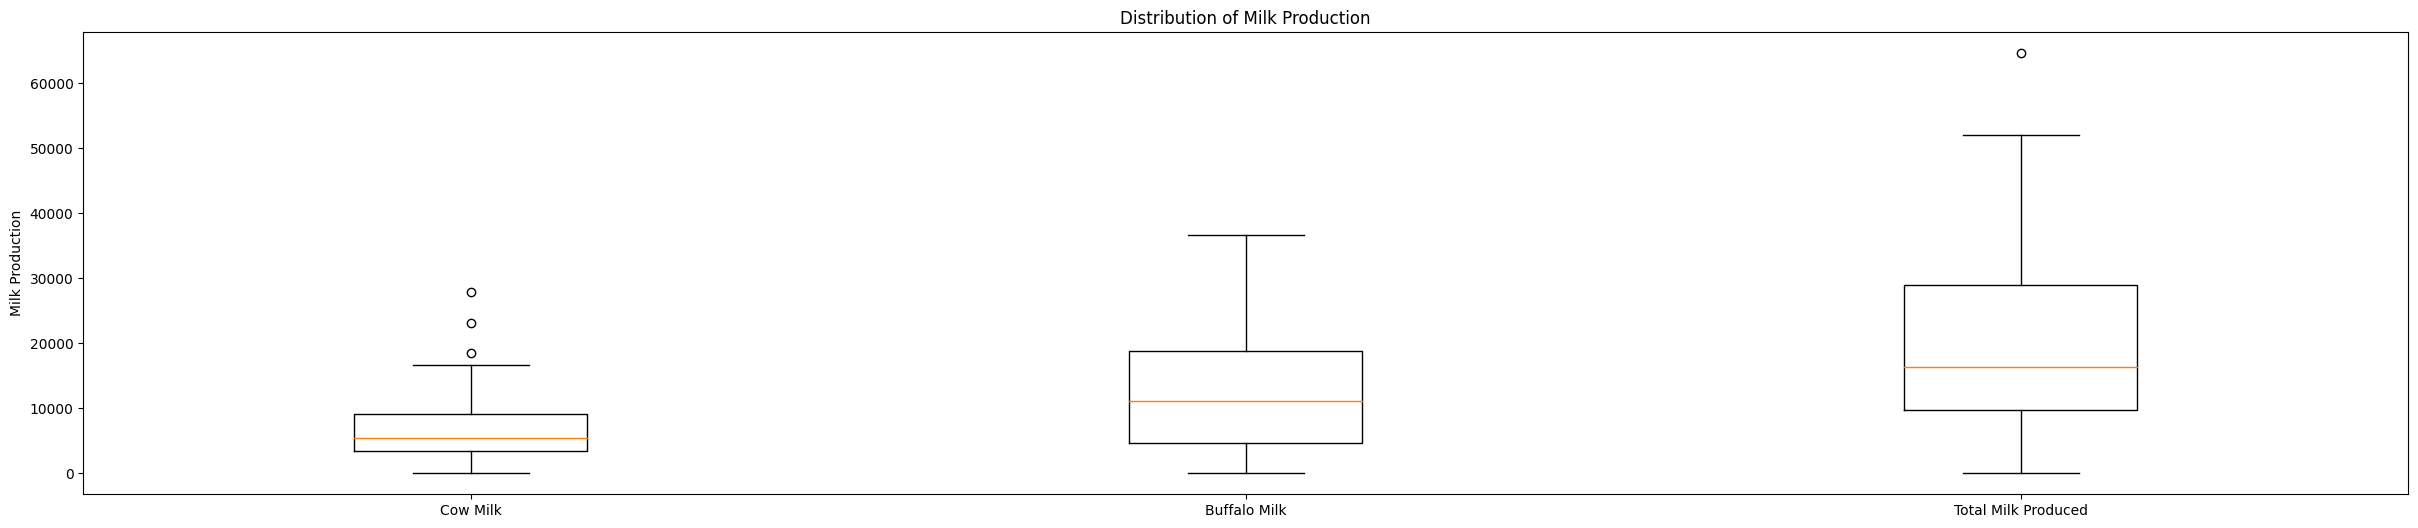

In [ ]:
# Box Plot
plt.figure(figsize=(30, 6))
plt.boxplot([cleaned_df['cow_milk'], cleaned_df['buff_milk'], cleaned_df['total_milk_produced']], labels=['Cow Milk', 'Buffalo Milk', 'Total Milk Produced'])
plt.ylabel('Milk Production')
plt.title('Distribution of Milk Production')
plt.show()

<ipython-input-86-b1191895fafc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cleaned_df.corr()


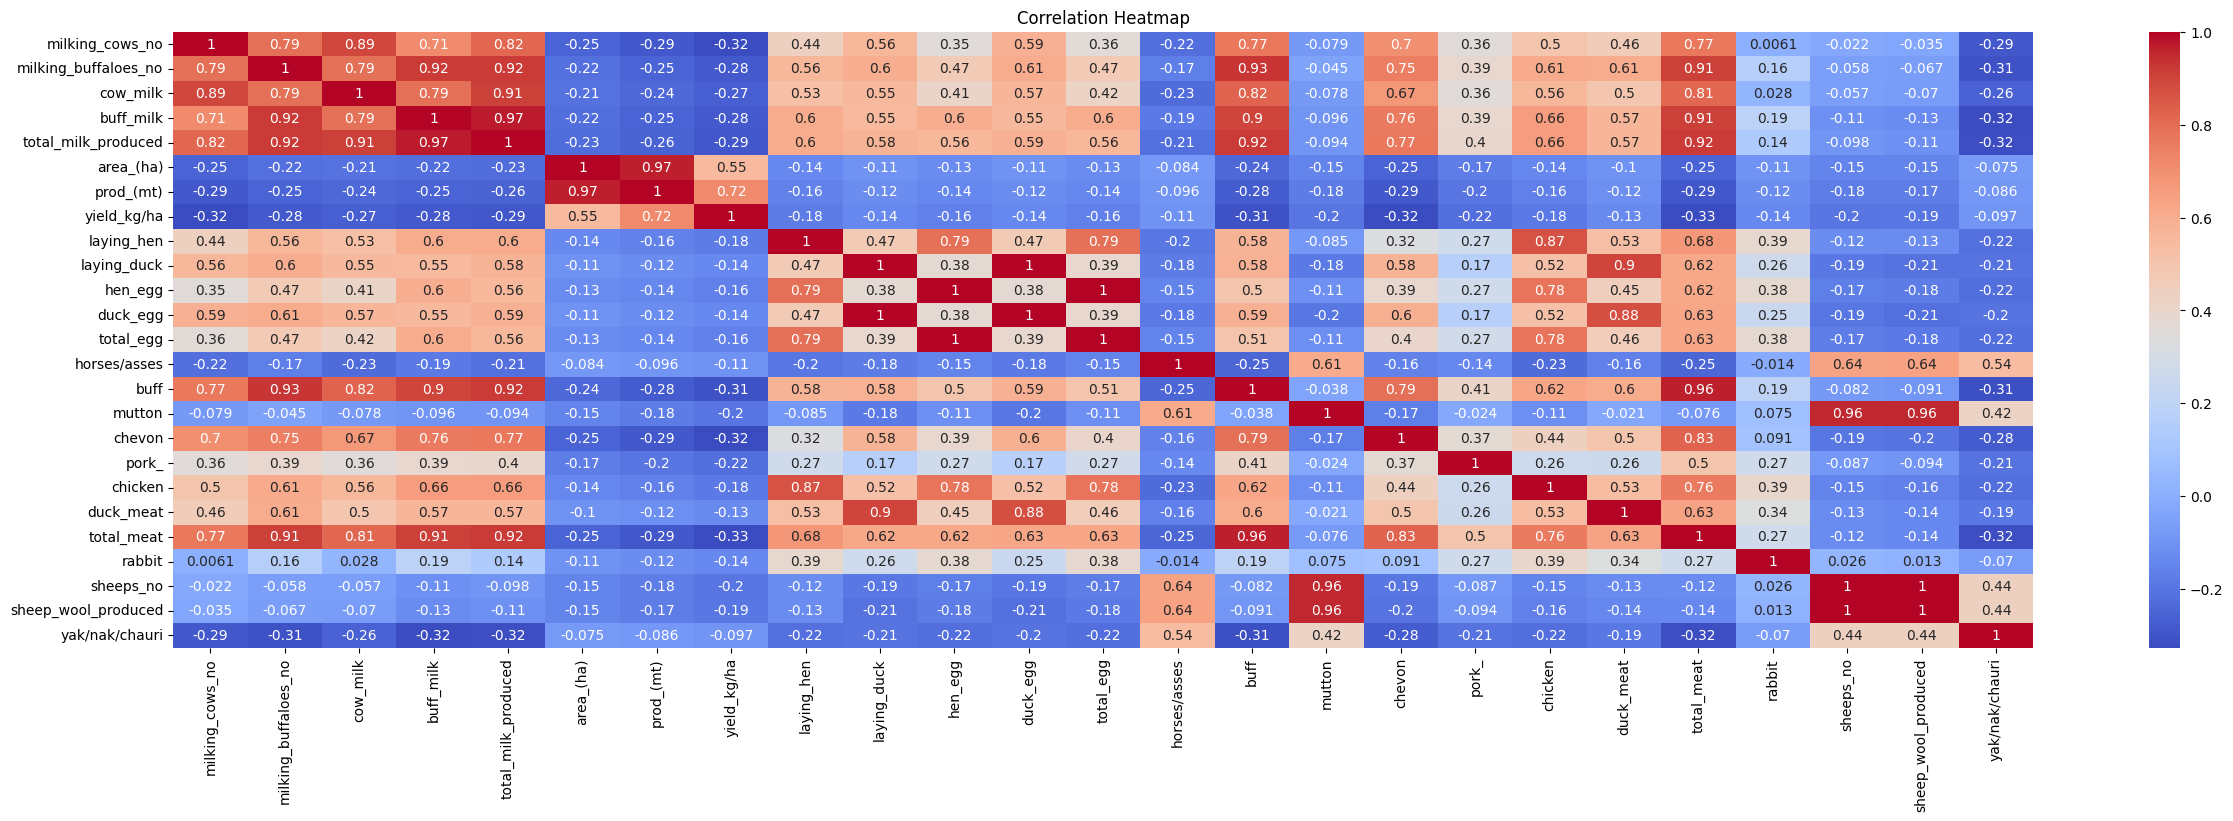

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(30, 8))
corr_matrix = cleaned_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Calculate average milk production

In [ ]:
average_cow_milk_production = cleaned_df['cow_milk'].mean()
print("Average cow milk production:", round(average_cow_milk_production, 2))

Average cow milk production: 6859.65


In [ ]:
districts_above_average = cleaned_df[cleaned_df['cow_milk'] >= average_cow_milk_production]

print("Districts where cow milk production is equal to or more than the average:")
print(districts_above_average[['district', 'cow_milk']])

count_districts_above_average = len(districts_above_average)
print("Number of districts where cow milk production is equal to or more than the average:", count_districts_above_average)

Districts where cow milk production is equal to or more than the average:
       district  cow_milk
1     PANCHTHAR    8511.0
2     TERHATHUM   10089.0
3      DHANKUTA    8176.0
4       BHOJPUR    7324.0
5       KHOTANG    7105.0
7      UDAYAPUR    9092.0
8       SAPTARI   16654.0
9        SIRAHA    8125.0
13     SINDHULI    8024.0
17      NUWAKOT   12234.0
18      DHADING   13791.0
19    MAKWANPUR   12440.0
20    MAHOTTARI    9661.0
21      SARLAHI   15374.0
22     RAUTAHAT   13162.0
23         BARA   11952.0
27       GORKHA    7653.0
29        KASKI    9782.0
36  NAWALPARASI   18451.0
37    RUPANDEHI   12120.0
46        BANKE    8956.0
47      BARDIYA   10792.0
52         DOTI    7843.0
54   DADELDHURA    7045.0
55      KAILALI   27905.0
56   KANCHANPUR   23146.0
Number of districts where cow milk production is equal to or more than the average: 26


In [ ]:
average_milk_production = (cleaned_df["total_milk_produced"]).mean()
print("Average cow and buffalo milk production:", round(average_milk_production, 2))

Average cow and buffalo milk production: 19710.89


In [ ]:
average_milk_production = cleaned_df[cleaned_df['total_milk_produced'] >= average_milk_production]

print("Districts where cow and buffalo milk production is equal to or more than the average:")
print(average_milk_production[['district', 'total_milk_produced']])

count_average_milk_production = len(average_milk_production)
print("Number of districts where cow milk production is equal to or more than the average:", count_average_milk_production)

Districts where cow and buffalo milk production is equal to or more than the average:
         district  total_milk_produced
2       TERHATHUM              21589.0
4         BHOJPUR              21508.0
7        UDAYAPUR              31779.0
8         SAPTARI              41882.0
9          SIRAHA              33749.0
11  SINDHUPALCHOK              25023.0
17        NUWAKOT              31171.0
18        DHADING              38207.0
19      MAKWANPUR              43214.0
20      MAHOTTARI              28108.0
21        SARLAHI              33199.0
22       RAUTAHAT              28531.0
23           BARA              34690.0
24          PARSA              20287.0
29          KASKI              41016.0
31          PALPA              28402.0
33        BAGLUNG              23221.0
35   ARGHAKHANCHI              29037.0
36    NAWALPARASI              52047.0
37      RUPANDEHI              38613.0
46          BANKE              40018.0
47        BARDIYA              38576.0
55        KAILALI

#Change Data by districts to data by province

In [ ]:
# Create a hash table mapping districts to provinces
district_to_province = {
    'Province 1': province_1,
    'Province 2': province_2,
    'Province 3': province_3,
    'Province 4': province_4,
    'Province 5': province_5,
    'Province 6': province_6,
    'Province 7': province_7
}

In [ ]:
# Function to assign provinces to districts
def assign_province(district):
    for province, districts in district_to_province.items():
        if district in districts:
            return province
    return None

In [ ]:
# Add a new column for province
cleaned_df['province'] = cleaned_df['district'].apply(assign_province)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district              62 non-null     object 
 1   milking_cows_no       62 non-null     float64
 2   milking_buffaloes_no  62 non-null     float64
 3   cow_milk              62 non-null     float64
 4   buff_milk             62 non-null     float64
 5   total_milk_produced   62 non-null     float64
 6   area_(ha)             62 non-null     float64
 7   prod_(mt)             62 non-null     float64
 8   yield_kg/ha           62 non-null     float64
 9   laying_hen            62 non-null     float64
 10  laying_duck           62 non-null     float64
 11  hen_egg               62 non-null     float64
 12  duck_egg              62 non-null     float64
 13  total_egg             62 non-null     float64
 14  horses/asses          62 non-null     float64
 15  buff                  62 

In [ ]:
 # Group the data by province and sum the numerical columns
province_df = cleaned_df.groupby('province').sum()

# Reset index to have 'province' as a column instead of the index
province_df.reset_index(inplace=True)

# Save the aggregated DataFrame to a CSV file
province_df.to_csv('province_data.csv', index=False)

# Display the aggregated DataFrame
province_df

<ipython-input-96-417dabc87c1b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  province_df = cleaned_df.groupby('province').sum()


,province,milking_cows_no,milking_buffaloes_no,cow_milk,buff_milk,total_milk_produced,area_(ha),prod_(mt),yield_kg/ha,laying_hen,...,mutton,chevon,pork_,chicken,duck_meat,total_meat,rabbit,sheeps_no,sheep_wool_produced,yak/nak/chauri
0,Province 1,105278.0,108659.0,60241.0,84833.0,145073.0,0.0,0.0,0.0,537951.0,...,217.0,6063.0,5823.0,2742.0,10.0,30574.0,2958.0,51855.0,36762.0,6452.0
1,Province 2,126969.0,186860.0,81460.0,138986.0,220446.0,0.0,0.0,0.0,1163556.0,...,19.0,8446.0,1718.0,5345.0,46.0,37027.0,65.0,6199.0,4650.0,0.0
2,Province 3,114057.0,167721.0,69432.0,138299.0,207731.0,0.0,0.0,0.0,2603087.0,...,205.0,6454.0,2219.0,13242.0,20.0,43186.0,4194.0,61842.0,45945.0,10831.0
3,Province 4,50421.0,106575.0,34655.0,90914.0,125569.0,0.0,0.0,0.0,716930.0,...,382.0,3807.0,2397.0,3928.0,32.0,24309.0,3593.0,96715.0,71978.0,14823.0
4,Province 5,122352.0,228193.0,75816.0,198503.0,274319.0,143.0,127.0,3419.0,1159412.0,...,256.0,10419.0,3086.0,6237.0,28.0,45539.0,3926.0,80733.0,56700.0,0.0
5,Province 6,35181.0,51308.0,15758.0,32805.0,48563.0,0.0,0.0,0.0,86019.0,...,572.0,2225.0,395.0,493.0,1.0,10152.0,2467.0,170282.0,126517.0,17228.0
6,Province 7,130595.0,132257.0,87936.0,112438.0,200374.0,0.0,0.0,0.0,537736.3,...,335.0,6893.0,985.0,2734.0,6.0,29107.0,1387.0,102571.0,76314.0,892.0


#Splitting Dataset into training and testing

In [ ]:
# Function to split the data into training and testing sets
def split_data(cleaned_df, features, target_column, test_size=0.2, random_state=42):
    X = cleaned_df[features]
    y = cleaned_df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Features and target column
features = ['milking_cows_no', 'milking_buffaloes_no']
target_column = 'total_milk_produced'

# Split the data
X_train, X_test, y_train, y_test = split_data(cleaned_df, features, target_column)

#Visualizing the Split Data

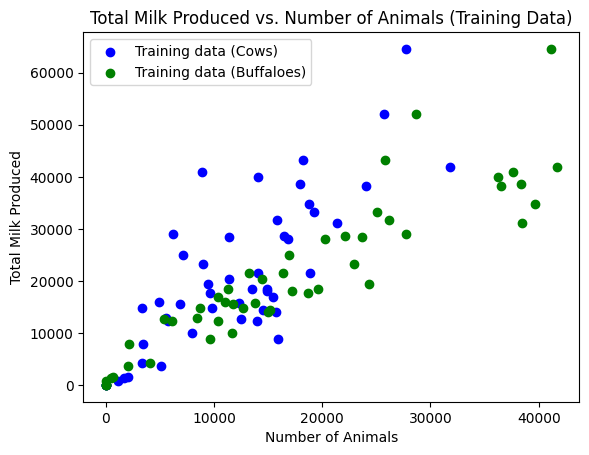

In [ ]:
# Visualize the training data
plt.scatter(X_train['milking_cows_no'], y_train, color='blue', label='Training data (Cows)')
plt.scatter(X_train['milking_buffaloes_no'], y_train, color='green', label='Training data (Buffaloes)')
plt.xlabel('Number of Animals')
plt.ylabel('Total Milk Produced')
plt.title('Total Milk Produced vs. Number of Animals (Training Data)')
plt.legend()
plt.show()

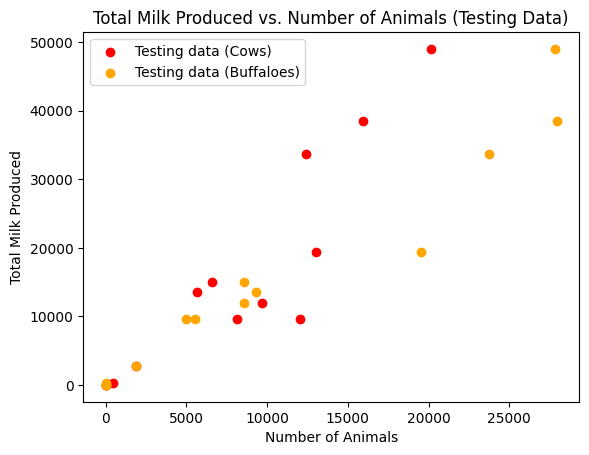

In [ ]:
# Visualize the testing data
plt.scatter(X_test['milking_cows_no'], y_test, color='red', label='Testing data (Cows)')
plt.scatter(X_test['milking_buffaloes_no'], y_test, color='orange', label='Testing data (Buffaloes)')
plt.xlabel('Number of Animals')
plt.ylabel('Total Milk Produced')
plt.title('Total Milk Produced vs. Number of Animals (Testing Data)')
plt.legend()
plt.show()

#Linear Regression Model

In [ ]:
# Instantiate the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

#Visualize the prediction

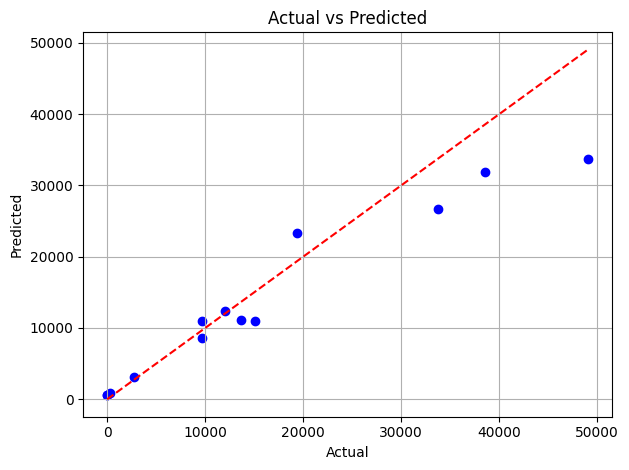

In [ ]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plot the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

#Evaluating the Model

##Mean Absolute Error

Mean Absolute Error (MAE): 3429.6728344427083


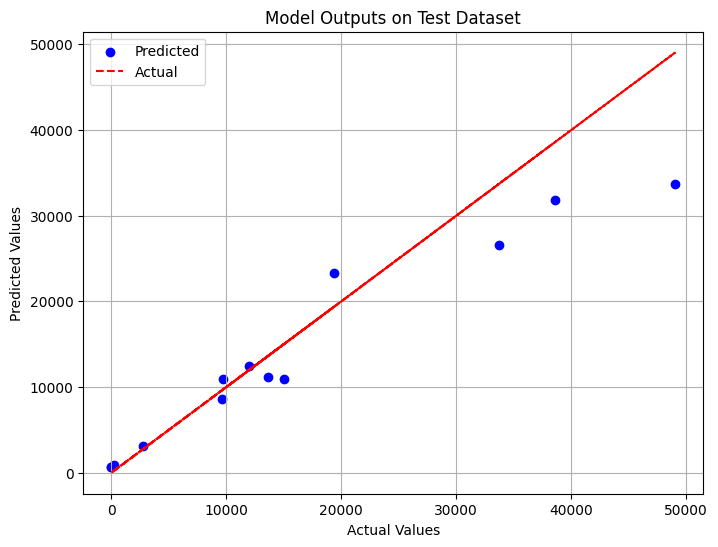

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Plotting the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')
plt.title('Model Outputs on Test Dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

##Mean Squared Error

Mean Squared Error (MSE): 28742503.78653632


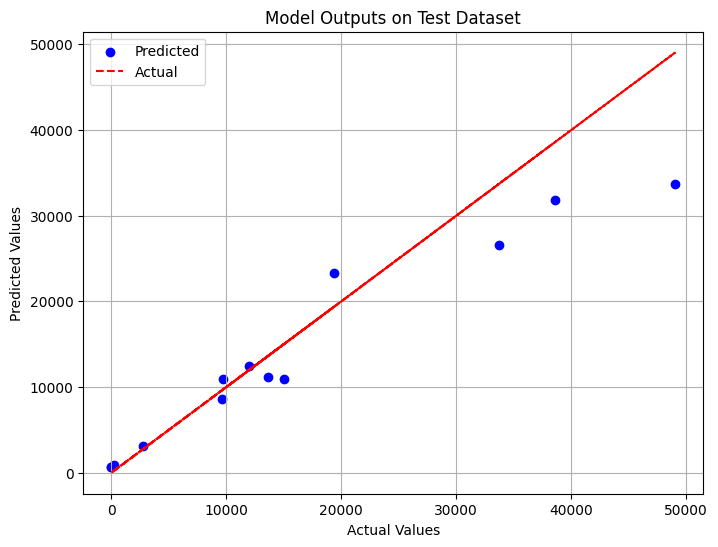

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Plotting the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')
plt.title('Model Outputs on Test Dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

##Root Mean Squared Error

Root Mean Squared Error (RMSE): 5361.203576300411


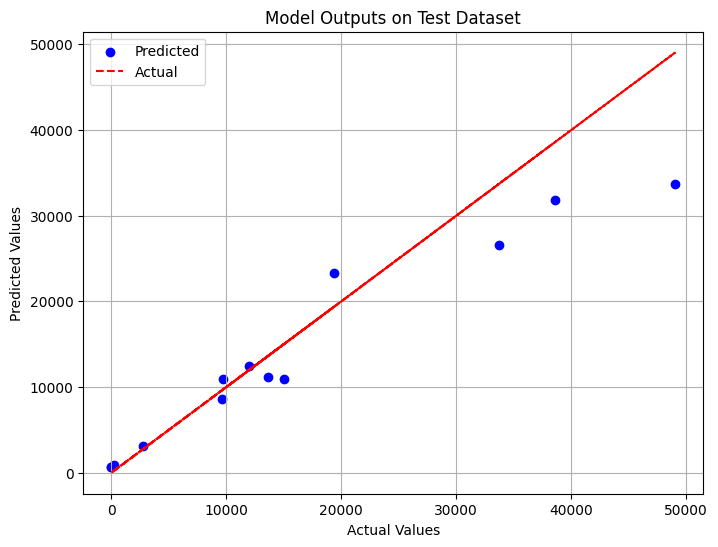

In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')
plt.title('Model Outputs on Test Dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#Export the cleaned dataset

In [105]:
from google.colab import files
cleaned_df.to_csv('cleaned_df.csv', index=False)
files.download('cleaned_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>